In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
df = pd.read_csv("dataset.csv")

df.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [13]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


,Unnamed: 0,open,high,low,close,volume,marketCap
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10
min,0.000000,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,72945.000000,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12


In [14]:
df.isnull().sum()


Unnamed: 0     0
open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

In [ ]:
df['crypto_name'].value_counts()

#Insight: Dataset contains multiple cryptocurrencies like Bitcoin, Litecoin, etc.

crypto_name
Bitcoin                  3248
Litecoin                 3248
XRP                      3157
Dogecoin                 3024
Monero                   2866
Stellar                  2791
Tether                   2582
Ethereum                 2424
Ethereum Classic         2072
Basic Attention Token    1760
EOS                      1730
Bitcoin Cash             1708
BNB                      1706
TRON                     1656
Decentraland             1652
Chainlink                1649
Cardano                  1638
Maker                    1605
Filecoin                 1565
Theta Network            1530
Huobi Token              1513
Ravencoin                1478
Tezos                    1365
VeChain                  1332
Quant                    1325
USD Coin                 1266
Cronos                   1199
Wrapped Bitcoin          1152
Cosmos                   1109
Polygon                  1064
OKB                      1062
UNUS SED LEO             1041
Algorand                 101

In [16]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(['crypto_name', 'date'], inplace=True)


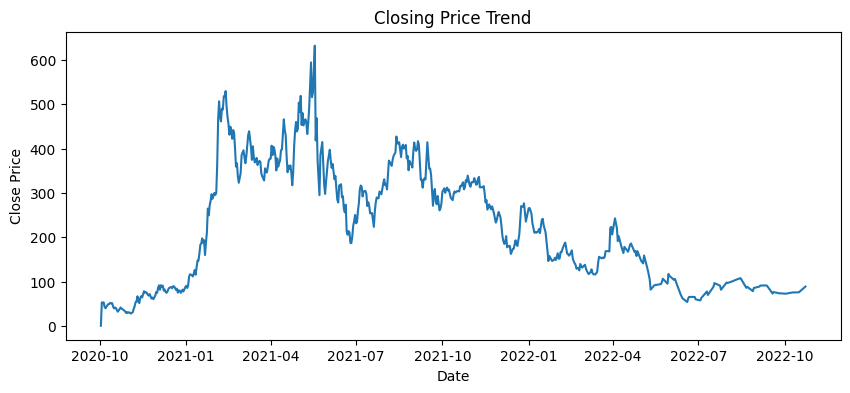

In [ ]:
btc = df[df['crypto_name'] == df['crypto_name'].unique()[0]]

plt.figure(figsize=(10,4))
plt.plot(btc['date'], btc['close'])
plt.title("Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

#Insight: Shows price fluctuations over time.

In [18]:
df['return'] = df.groupby('crypto_name')['close'].pct_change()
df['return'].describe()


count    72890.000000
mean         0.008279
std          0.763882
min         -0.999800
25%         -0.026011
50%          0.000000
75%          0.027196
max        177.327290
Name: return, dtype: float64

In [19]:
df['volatility_14'] = (
    df.groupby('crypto_name')['return']
    .rolling(14)
    .std()
    .reset_index(level=0, drop=True)
)


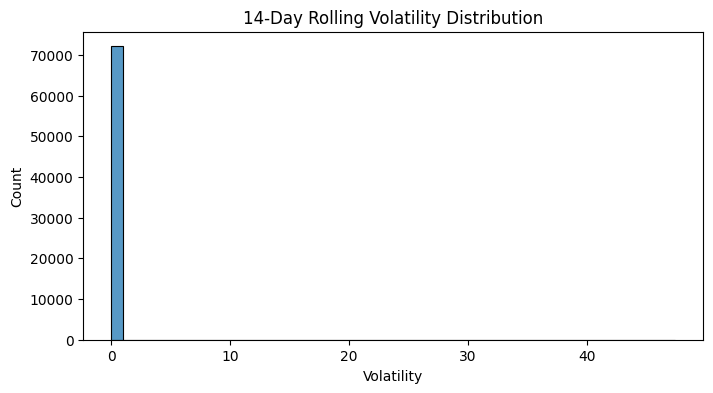

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['volatility_14'].dropna(), bins=50)
plt.title("14-Day Rolling Volatility Distribution")
plt.xlabel("Volatility")
plt.show()

#Insight:Most volatility values are concentrated in lower ranges
#Few extreme high-volatility periods exist

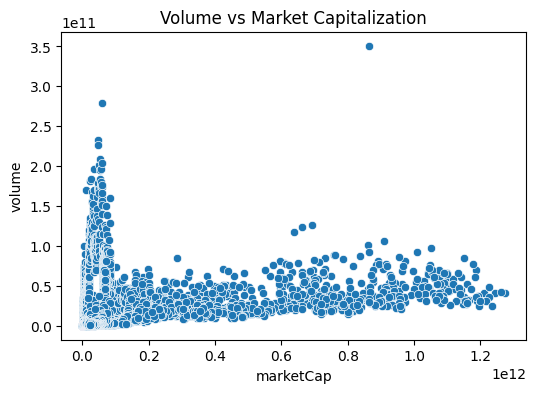

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='marketCap', y='volume', data=df)
plt.title("Volume vs Market Capitalization")
plt.show()

#Insight: Higher market cap cryptos tend to have higher trading volume.

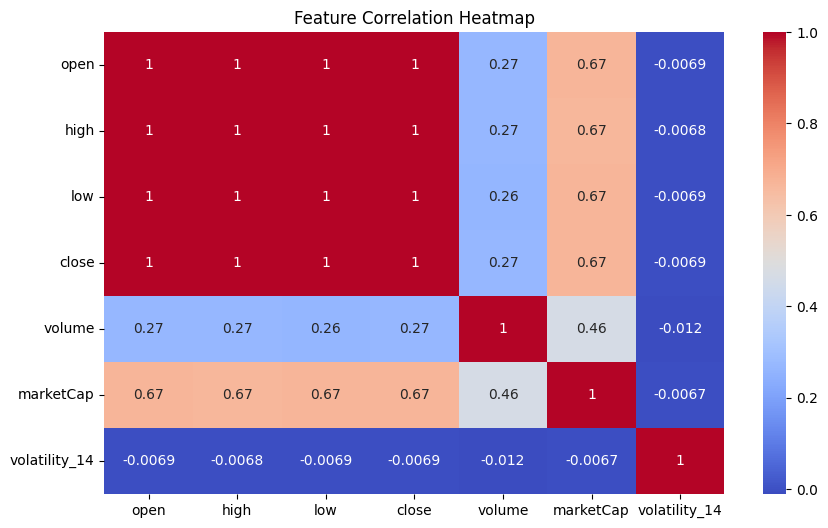

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df[['open','high','low','close','volume','marketCap','volatility_14']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation Heatmap")
plt.show()

#Insight:OHLC prices are highly correlated
#Volatility shows moderate correlation with price movements

### EDA Summary
- The dataset contains multiple cryptocurrencies with daily OHLC data.
- Prices show high variability, confirming market volatility.
- Rolling volatility highlights periods of high risk.
- Volume and market capitalization exhibit positive correlation.
- Feature relationships justify using regression-based ML models.
